**Name**: Sahaj Shrestha
**Course**: MSCS 634 – Advanced Data Mining  
**Lab**: Lab 5 – Hierarchical and DBSCAN Clustering

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Examining the dataset's structure using pandas functions
print(X.head())
print(X.info())
print(X.describe())

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

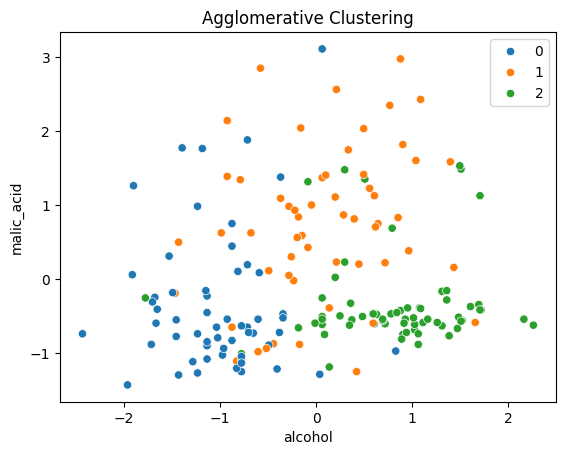

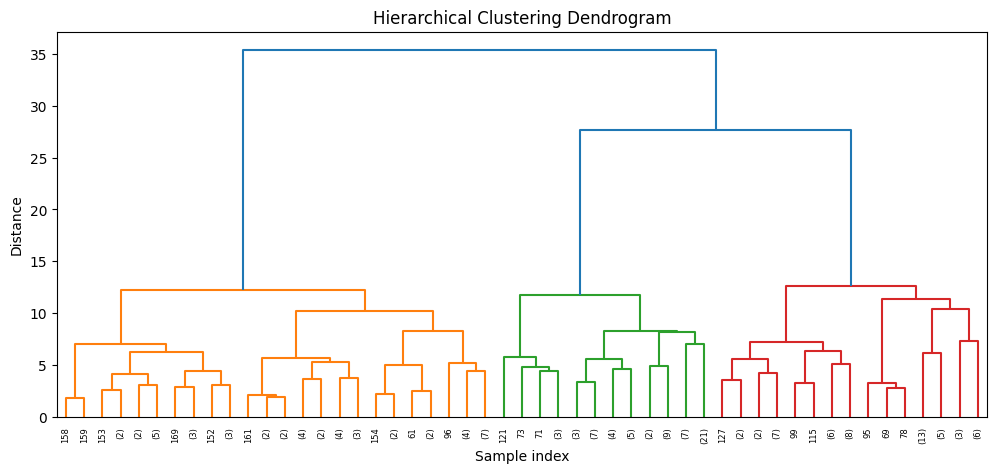

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# Applying Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_cluster.fit_predict(X_scaled)

# Scatter plot of clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_agg, palette="tab10")
plt.title("Agglomerative Clustering")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

# Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


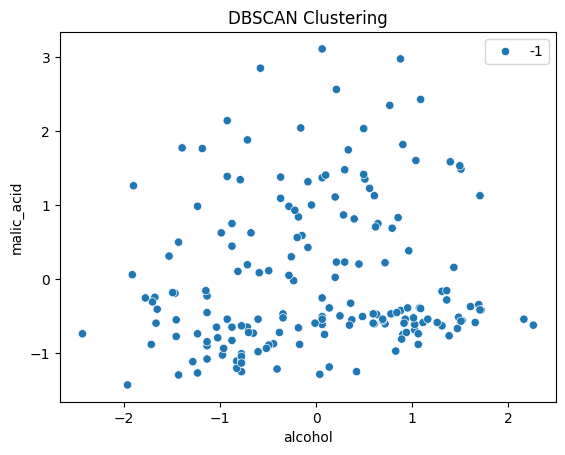

Silhouette Score (Agglomerative): 0.2774439826952266
Silhouette Score (DBSCAN): -1
Homogeneity Score (DBSCAN): 0.0
Completeness Score (DBSCAN): 1.0


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# DBSCAN scatter plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_dbscan, palette="tab10")
plt.title("DBSCAN Clustering")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

# Evaluation Metrics
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
else:
    silhouette_dbscan = -1

print("Silhouette Score (Agglomerative):", silhouette_score(X_scaled, labels_agg))
print("Silhouette Score (DBSCAN):", silhouette_dbscan)
print("Homogeneity Score (DBSCAN):", homogeneity_score(y, labels_dbscan))
print("Completeness Score (DBSCAN):", completeness_score(y, labels_dbscan))

